In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Read in truck 1 csv and select important columns for analysis. Use pandas parameters for possible speed boost.  


In [2]:
df_T1 = pd.read_csv(r'../data/trucks/truck1.csv', index_col = "Time", usecols = ['Time','1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch2_BattOut_100A',
 '4649_Ch3_Trailer_50A',
 '4649_Ch4_Inverter_100A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch7_200A_BatterySeparator',
 '4649_Ch8_APU_BatteryVoltage',
 'AmbientAirTemperature_V',
 'BarometricPressure_BB1_X_E',
 'EngExhaustGasTemp',
 'EngineAirIntakeTemp_BB1_X_E',
 'EngineSpeed',
 'EngIntakeManifold1Temp',
 'RoadInclinationVP15',
 'TotalVehicleDistanceHighRes',
 'VehicleSpeed',
 'VehicleWeightVP15',
 'WheelBasedVehicleSpeed',
 'CPU load',
 'GPS altitude',
 'GPS speed'] , engine = 'c', skip_blank_lines = True)

#### convert time col to datetime and view head of file, enough to view actual values.

In [3]:
df_T1.index = pd.to_datetime(df_T1.index)


In [4]:
list(df_T1.head())

['1730_CH9_ AutomaticStartStop',
 '1730_CH10_Truck_Batteries',
 '4649_Ch1_Alternator_250A',
 '4649_Ch2_BattOut_100A',
 '4649_Ch3_Trailer_50A',
 '4649_Ch4_Inverter_100A',
 '4649_Ch5_Fridge_50A',
 '4649_Ch6_200A_APU_BatteryBank',
 '4649_Ch7_200A_BatterySeparator',
 '4649_Ch8_APU_BatteryVoltage',
 'AmbientAirTemperature_V',
 'BarometricPressure_BB1_X_E',
 'EngExhaustGasTemp',
 'EngineAirIntakeTemp_BB1_X_E',
 'EngineSpeed',
 'EngIntakeManifold1Temp',
 'RoadInclinationVP15',
 'TotalVehicleDistanceHighRes',
 'VehicleSpeed',
 'VehicleWeightVP15',
 'WheelBasedVehicleSpeed',
 'CPU load',
 'GPS altitude',
 'GPS speed']

### describe the selected data

In [15]:
df_T1.ffill().bfill().head(10000)


,1730_CH9_ AutomaticStartStop,1730_CH10_Truck_Batteries,4649_Ch1_Alternator_250A,4649_Ch2_BattOut_100A,4649_Ch3_Trailer_50A,4649_Ch4_Inverter_100A,4649_Ch5_Fridge_50A,4649_Ch6_200A_APU_BatteryBank,4649_Ch7_200A_BatterySeparator,4649_Ch8_APU_BatteryVoltage,...,EngineSpeed,EngIntakeManifold1Temp,RoadInclinationVP15,TotalVehicleDistanceHighRes,VehicleSpeed,VehicleWeightVP15,WheelBasedVehicleSpeed,CPU load,GPS altitude,GPS speed
Time,,,,,,,,,,,,,,,,,,,,,
2019-08-07 07:54:02.959,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1173.250,28.0,1.6,246045845.0,8.042969,18000.0,7.968750,40.0,0.000000,6.111600
2019-08-07 07:54:03.059,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1173.250,28.0,1.6,246045845.0,8.042969,18000.0,8.042969,40.0,0.000000,6.111600
2019-08-07 07:54:03.159,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1173.250,28.0,1.6,246045845.0,8.105469,18000.0,8.042969,40.0,0.000000,6.111600
2019-08-07 07:54:03.259,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1172.250,28.0,1.4,246045845.0,8.105469,18000.0,8.105469,40.0,0.000000,6.111600
2019-08-07 07:54:03.359,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1173.250,28.0,1.4,246045845.0,8.125000,18000.0,8.105469,40.0,0.000000,6.111600
2019-08-07 07:54:03.459,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1176.500,28.0,1.4,246045845.0,8.125000,18000.0,8.125000,40.0,0.000000,6.111600
2019-08-07 07:54:03.559,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1177.625,28.0,1.4,246045845.0,8.128906,18000.0,8.125000,40.0,0.000000,6.111600
2019-08-07 07:54:03.659,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1177.250,28.0,1.4,246045845.0,8.128906,18000.0,8.128906,40.0,0.000000,6.111600
2019-08-07 07:54:03.759,0.006867,13.949645,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,12.174411,...,1175.000,28.0,1.4,246045845.0,8.148438,18000.0,8.128906,40.0,0.000000,6.111600


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


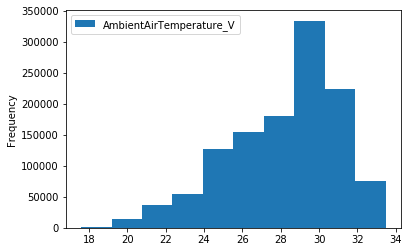

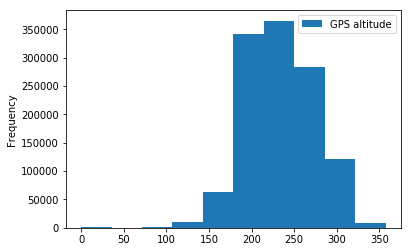

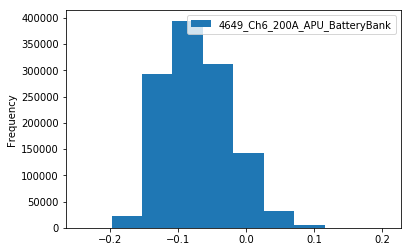

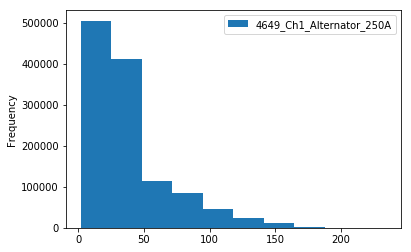

In [67]:
date5days = df_T1["2019-08-05":"2019-08-10"]
print(date5days[['AmbientAirTemperature_V']].ffill().bfill().plot.hist())
print(date5days[['GPS altitude']].ffill().bfill().plot.hist())
print(date5days[['4649_Ch6_200A_APU_BatteryBank']].ffill().bfill().plot.hist())
print(date5days[['4649_Ch1_Alternator_250A']].ffill().bfill().plot.hist())

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


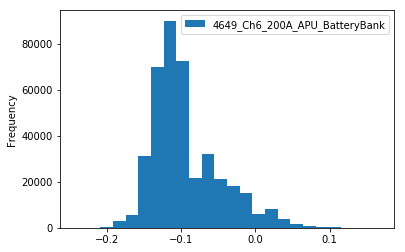

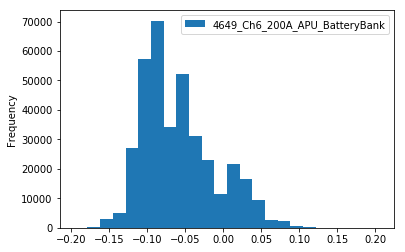

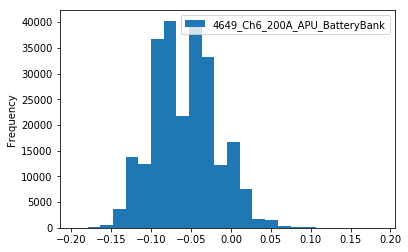

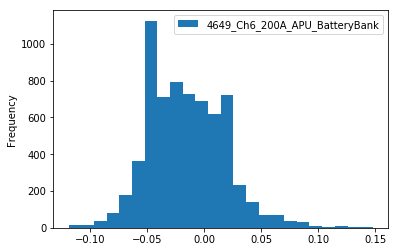

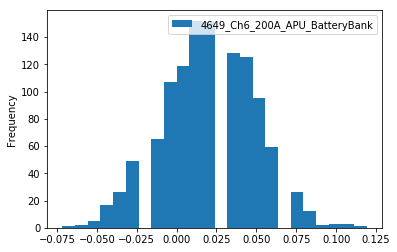

In [58]:
#daily data from time index

date85 = df_T1["2019-08-05"]
date86 = df_T1["2019-08-06"]
date87 = df_T1["2019-08-07"]
date88 = df_T1["2019-08-08"]
date89 = df_T1["2019-08-09"]
date810 = df_T1["2019-08-10"]


# need put these into a list to print each metric for each day
print(date85[['4649_Ch6_200A_APU_BatteryBank']].ffill().bfill().plot.hist(bins=24))
print(date87[['4649_Ch6_200A_APU_BatteryBank']].ffill().bfill().plot.hist(bins=24))
print(date88[['4649_Ch6_200A_APU_BatteryBank']].ffill().bfill().plot.hist(bins=24))
print(date89[['4649_Ch6_200A_APU_BatteryBank']].ffill().bfill().plot.hist(bins=24))
print(date810[['4649_Ch6_200A_APU_BatteryBank']].ffill().bfill().plot.hist(bins=24))

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


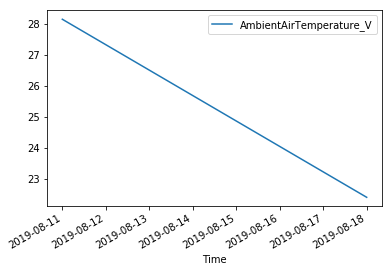

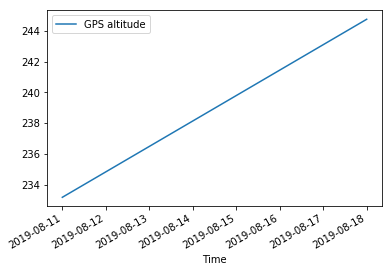

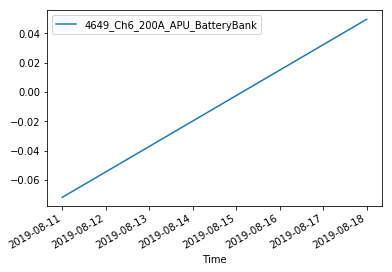

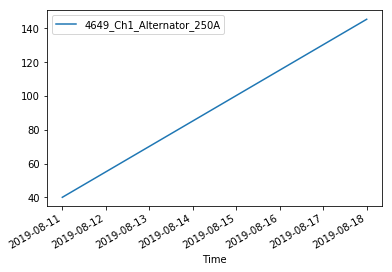

In [9]:
print(df_T1[['AmbientAirTemperature_V']].resample("W").mean().plot())
print(df_T1[['GPS altitude']].resample("W").mean().plot())
print(df_T1[['4649_Ch6_200A_APU_BatteryBank']].resample("W").mean().plot())
print(df_T1[['4649_Ch1_Alternator_250A']].resample("W").mean().plot())